In [2]:
import pandas as pd
import numpy as np
df= pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
import matplotlib.pyplot as plt
from sklearn import linear_model

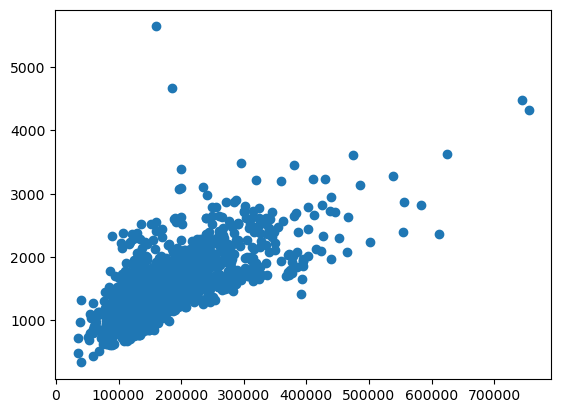

In [4]:
%matplotlib inline
plt.scatter(df.SalePrice,df.GrLivArea)

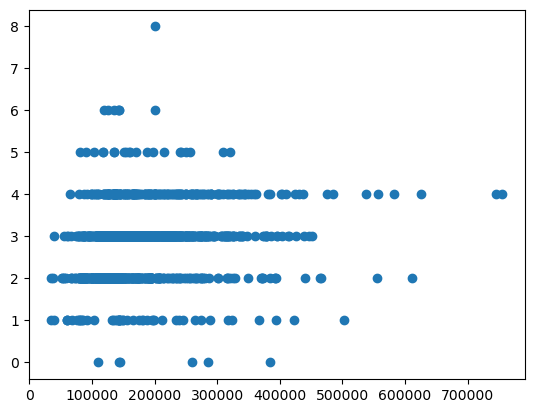

In [5]:
%matplotlib inline
plt.scatter(df.SalePrice,df.BedroomAbvGr)

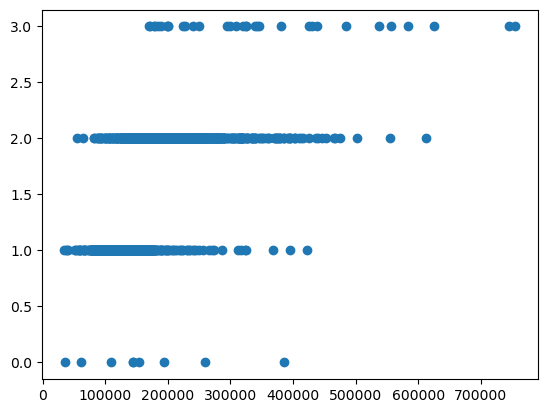

In [6]:
%matplotlib inline
plt.scatter(df.SalePrice,df.FullBath)

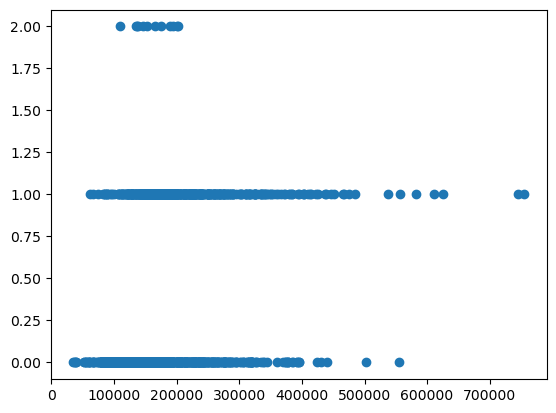

In [7]:
%matplotlib inline
plt.scatter(df.SalePrice,df.HalfBath)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:

cleaned_data = df[features + [target]].dropna()
X = cleaned_data[features]
y = cleaned_data[target]
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model= LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
model_coefficients= pd.DataFrame({
    'Features': features,
    'Coefficient':model.coef_
})
print("Mean squared Error ", mse)
print("R2 score: ", r2)
print("\nfeature coefficients:")
print(model_coefficients)

Mean squared Error  2810942965.2180653
R2 score:  0.6335301929422245

feature coefficients:
       Features   Coefficient
0     GrLivArea    101.732566
1  BedroomAbvGr -26704.014676
2      FullBath  30848.028471
3      HalfBath   4611.653264


In [17]:
train_data =pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
features = ['GrLivArea','BedroomAbvGr','FullBath','HalfBath']
target = 'SalePrice'
train_data =train_data[features+[target]].dropna()
X_train= train_data[features]
y_train = train_data[target]

X_test = test_data[features]
model= LinearRegression()
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)
y_train_pred =model.predict(X_train)
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)
model_coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})


print("Training Mean Squared Error (MSE):", mse_train)
print("Training R² Score:", r2_train)
print("\nFeature Coefficients:")
print(model_coefficients)

# Save predictions to a file (optional)
output = pd.DataFrame({
    'Id': test_data.index,  # Assuming 'Id' column exists in test data
    'PredictedSalePrice': test_predictions
})
output.to_csv('test_predictions.csv', index=False)

print("Predictions saved to 'test_predictions.csv'")

Training Mean Squared Error (MSE): 2625932483.691595
Training R² Score: 0.5836339766023473

Feature Coefficients:
        Feature   Coefficient
0     GrLivArea    108.223779
1  BedroomAbvGr -27911.624939
2      FullBath  30380.783580
3      HalfBath   3586.620081
Predictions saved to 'test_predictions.csv'


Predictions saved to 'test_predictions.csv'
